<h1>1976 Election</h1>
<ul>
    <li>Republican Candidate - Gerald Ford</li>
    <li>Democratic Candidate - Jimmy Carter</li>
</ul>

In [10]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', ':', '(', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', '', '–', 'still', 'good', 'well',
'said', 'â\x80\x9ci', 'gutenberg-tm', 'mr', 'project', 'one', 'uh', 'don’t',
 'would', 'made']


# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def debate_word_dictionary_generator (URL, name1, name2, modList, allWords):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds[i] = cleanWord (wds [i])
        
    name1Arr = []
    name2Arr = []
    switcher = 3
            
    for i in range(len(wds)):
        if wds[i] == name1:
            switcher = 1
            
        elif wds[i] == name2:
            switcher = 2
            
        elif wds[i] in modList:
            switcher = 3
            
        else:
            if switcher == 1:
                name1Arr.append(wds[i])
                
            elif switcher == 2:
                name2Arr.append(wds[i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf1 = Counter (name1Arr)
    wf2 = Counter (name2Arr)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf1. pop(k, None)
        wf2. pop(k, None)
           
        
    #how many regular words in the document?
    tw1 = 0
    for w in wf1:
       tw1 += wf1[w]
        
    tw2 = 0
    for w in wf2:
       tw2 += wf2[w] 
    # Get ordered list
    wfs1 = sorted (wf1 .items(), key = operator.itemgetter(1), reverse=True)
    ml1 = min(len(wfs1),30)
    
    wfs2 = sorted (wf2 .items(), key = operator.itemgetter(1), reverse=True)
    ml2 = min(len(wfs2),30)
    

    if not allWords:
        #Reverse the list because barh plots items from the bottom
        return [(wfs1 [ 0:ml1 ] [::-1], tw1), (wfs2 [ 0:ml2 ] [::-1], tw2)]
    else:
        #Reverse the list because barh plots items from the bottom
        return [(wfs1  [::-1], tw1), (wfs2  [::-1], tw2)]
        
# Now populate two lists    
debateArr = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/september-23-1976-debate-transcript/', "carter:", "ford:", ['reynolds:', 'newman:', 'gannon:', 'drew:'], False)
debateArr2 = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-6-1976-debate-transcript/', "carter:", "ford:", ['valeriani:', 'frederick:', 'frankel:', 'trewhitt:'], False)
debateArr3 = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-22-1976-debate-transcript/', "carter:", "ford:", ['walters:', 'kraft:', 'maynard:', 'nelson:'], False)

# Now populate two lists    
fullDebateArr = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/september-23-1976-debate-transcript/', "carter:", "ford:", ['reynolds:', 'newman:', 'gannon:', 'drew:'], True)
fullDebateArr2 = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-6-1976-debate-transcript/', "carter:", "ford:", ['valeriani:', 'frederick:', 'frankel:', 'trewhitt:'], True)
fullDebateArr3 = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-22-1976-debate-transcript/', "carter:", "ford:", ['walters:', 'kraft:', 'maynard:', 'nelson:'], True)

total_debate_arr_1 = {}
total_debate_arr_2 = {}

#small total array
for key, value in debateArr[0][0]:
    total_debate_arr_1[key] = value

for key, value in debateArr2[0][0]:
    if key in total_debate_arr_1:
        total_debate_arr_1[key] += value
    else:
        total_debate_arr_1[key] = value

for key, value in debateArr3[0][0]:
    if key in total_debate_arr_1:
        total_debate_arr_1[key] += value
    else:
        total_debate_arr_1[key] = value 
        
        
for key, value in debateArr[1][0]:
    total_debate_arr_2[key] = value

for key, value in debateArr2[1][0]:
    if key in total_debate_arr_2:
        total_debate_arr_2[key] += value
    else:
        total_debate_arr_2[key] = value

for key, value in debateArr3[1][0]:
    if key in total_debate_arr_2:
        total_debate_arr_2[key] += value
    else:
        total_debate_arr_2[key] = value
        
        
total_arr1 = sorted (total_debate_arr_1 .items(), key = operator.itemgetter(1), reverse=True)
total_ml1 = min(len(total_arr1),30)

total_arr2 = sorted (total_debate_arr_2 .items(), key = operator.itemgetter(1), reverse=True)
total_ml2 = min(len(total_arr2),30)

full_total_debate_arr_1 = {}
full_total_debate_arr_2 = {}

#large total array
for key, value in fullDebateArr[0][0]:
    full_total_debate_arr_1[key] = value

for key, value in fullDebateArr2[0][0]:
    if key in full_total_debate_arr_1:
        full_total_debate_arr_1[key] += value
    else:
        full_total_debate_arr_1[key] = value

for key, value in fullDebateArr3[0][0]:
    if key in full_total_debate_arr_1:
        full_total_debate_arr_1[key] += value
    else:
        full_total_debate_arr_1[key] = value 
        
        
for key, value in fullDebateArr[1][0]:
    full_total_debate_arr_2[key] = value

for key, value in fullDebateArr2[1][0]:
    if key in full_total_debate_arr_2:
        full_total_debate_arr_2[key] += value
    else:
        full_total_debate_arr_2[key] = value

for key, value in fullDebateArr3[1][0]:
    if key in full_total_debate_arr_2:
        full_total_debate_arr_2[key] += value
    else:
        full_total_debate_arr_2[key] = value
        
        
full_total_arr1 = sorted (total_debate_arr_1 .items(), key = operator.itemgetter(1), reverse=True)

full_total_arr2 = sorted (total_debate_arr_2 .items(), key = operator.itemgetter(1), reverse=True)


print(total_arr1)
print(total_arr2)

[('people', 138), ('country', 94), ('think', 80), ('ford', 78), ('we’ve', 71), ('president', 70), ('percent', 55), ('it’s', 52), ('government', 48), ('also', 47), ('administration', 43), ('work', 35), ('american', 34), ('believe', 32), ('world', 31), ('ms', 30), ('billion', 29), ('ought', 28), ('congress', 27), ('last', 27), ('got', 25), ('tax', 24), ('strong', 23), ('time', 22), ('years', 21), ('foreign', 20), ('court', 19), ('taxes', 18), ('unemployment', 18), ('countries', 18), ('us', 17), ('far', 17), ('policy', 17), ('defense', 17), ('know', 17), ('year', 16), ('programs', 16), ('strength', 16), ('nixon', 15), ('energy', 14), ('increase', 14), ('rate', 14), ('money', 14), ('that’s', 14), ('put', 14), ('say', 14), ('federal', 13), ('need', 13), ('among', 13), ('israel', 12), ('education', 12), ('weapons', 11), ('nations', 11), ('nation', 11), ('help', 11), ('two', 10), ('great', 10), ('i’ve', 10), ('there’s', 10), ('make', 10)]
[('united', 71), ('states', 70), ('people', 57), ('pre

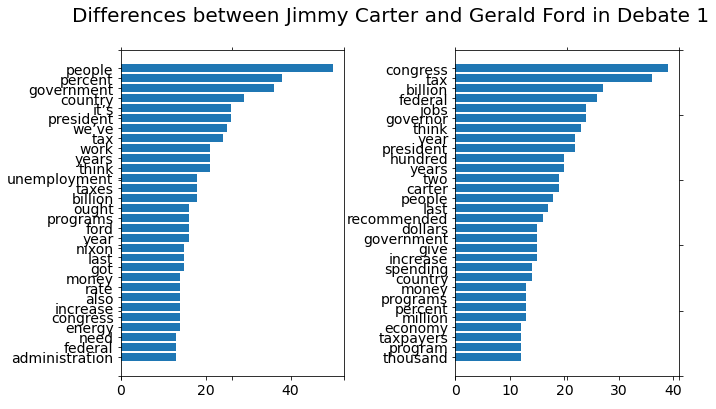

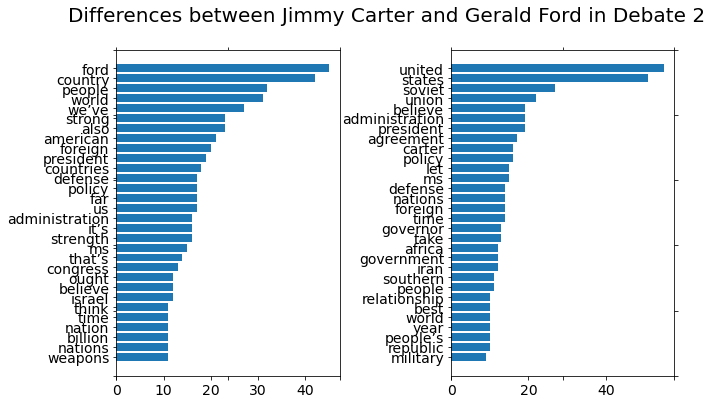

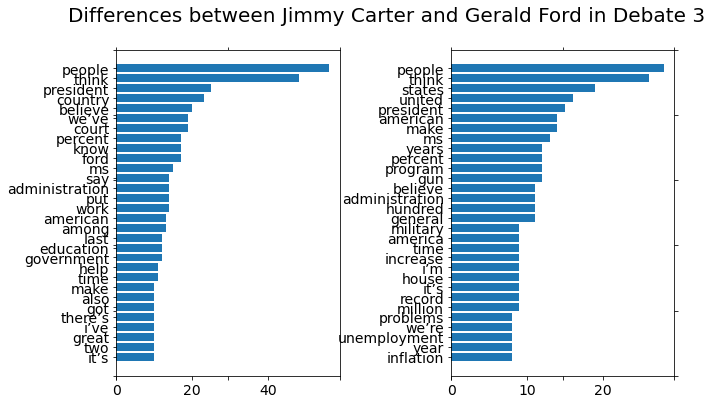

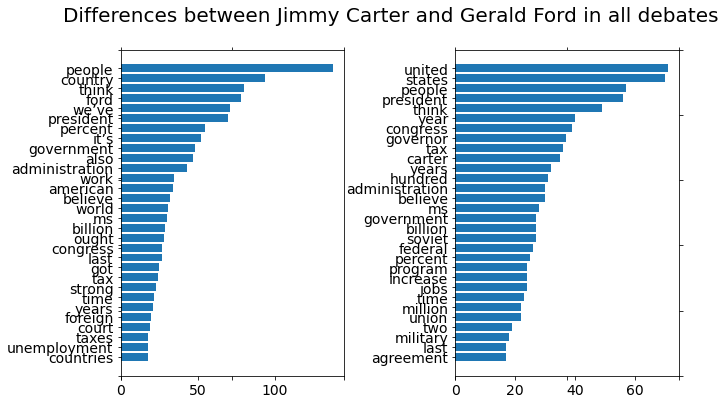

In [11]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (debateArr[0][0], debateArr[1][0], 'Differences between Jimmy Carter and Gerald Ford in Debate 1')
plotTwoLists (debateArr2[0][0], debateArr2[1][0], 'Differences between Jimmy Carter and Gerald Ford in Debate 2')
plotTwoLists (debateArr3[0][0], debateArr3[1][0], 'Differences between Jimmy Carter and Gerald Ford in Debate 3')
plotTwoLists (total_arr1[ 0:30 ] [::-1], total_arr2[ 0:30 ] [::-1], 'Differences between Jimmy Carter and Gerald Ford in all debates')

<h1>Swing States won by Each Candidate</h1>
<ul>
    <li>Carter - Florida, Minnesota, North Carolina, Ohio, Pennsylvania, Wisconsin</li>
    <li>Ford - Iowa, Michigan, Nevada, New Hampshire, Virginia, </li>
    
</ul>

<h3>Word Sentiment</h3>
<p>Here, Jimmy Carter uses 8% less positive words throughout all of his debates. This could be because Carter, the challenger, talked about the Watergate Scandal more, which was a huge controversy at the time.</p>

<h3>Additional Analyses</h3>

<p>I wanted to see if the average word length of a candidate would correlate with who would win certain elections.</p>

In [13]:
count = 0
total = 0
for key, value in total_arr1:
    for j in range(0, value):
        total += len(key)
        count += 1
    
print('Carter: ' + str(float(total/count)))

count = 0
total = 0
for key, value in total_arr2:
    for j in range(0, value):
        total += len(key)
        count += 1
    
print('Ford: ' + str(float(total/count)))

Carter: 5.955421686746988
Ford: 6.452045133991537


In [14]:
# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)

def debate_word_list (URL, name1, name2, modList):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds[i] = cleanWord (wds [i])
        
    name1Arr = []
    name2Arr = []
    switcher = 3
            
    for i in range(len(wds)):
        if wds[i] == name1:
            switcher = 1
            
        elif wds[i] == name2:
            switcher = 2
            
        elif wds[i] in modList:
            switcher = 3
            
        else:
            if switcher == 1:
                name1Arr.append(wds[i])
                
            elif switcher == 2:
                name2Arr.append(wds[i])
                
    return [name1Arr, name2Arr]
                
debateArrSent = debate_word_list ('https://debates.org/voter-education/debate-transcripts/september-23-1976-debate-transcript/', "carter:", "ford:", ['reynolds:', 'newman:', 'gannon:', 'drew:'])
debateArr2Sent = debate_word_list ('https://debates.org/voter-education/debate-transcripts/october-6-1976-debate-transcript/', "carter:", "ford:", ['valeriani:', 'frederick:', 'frankel:', 'trewhitt:'])
debateArr3Sent = debate_word_list ('https://debates.org/voter-education/debate-transcripts/october-22-1976-debate-transcript/', "carter:", "ford:", ['walters:', 'kraft:', 'maynard:', 'nelson:'])


cand1_arr = debateArrSent[0] + debateArr2Sent[0] + debateArr3Sent[0]
cand2_arr = debateArrSent[1] + debateArr2Sent[1] + debateArr3Sent[1] 

out_str = " "

sent1 = vader.polarity_scores(out_str.join(cand1_arr))
sent2 = vader.polarity_scores(out_str.join(cand2_arr))

print('carter')
print(sent1)
print('ford')
print(sent2)

carter
{'neg': 0.08, 'neu': 0.788, 'pos': 0.132, 'compound': 1.0}
ford
{'neg': 0.057, 'neu': 0.793, 'pos': 0.15, 'compound': 1.0}


<h3>Word Sentiment</h3>
<p>Here, Jimmy Carter uses 2% less positive words throughout all of his debates. This could be because Carter, the challenger, talked about the Watergate Scandal more, which was a huge controversy at the time.</p>